## Лабораторная работа №3. 
### Вариант 6.<br> Выполнил Пухов Артём.<br> Группа 15-В-2

In [42]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import pearsonr, spearmanr

In [43]:
# исходные данные
df_name = r'airfoil_self_noise.dat.txt'
# видоизмененный датасет
new_df_name = 'df.txt'
# заголовок, который будет добавлен в новый датасет
header = 'Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pre ssure level\n'

with open(df_name, 'r', newline='') as read_file, \
         open(new_df_name, 'w', newline='') as write_file:
    list_lines = read_file.readlines()
    # пробежимся по строкам в исходном файле
    for i, line in enumerate(list_lines):
        # заменим знаки табуляции на запятые
        list_lines[i] = line.replace('\t', ',')
        # заменим подряд идущие пробелы на запятые
        max_spaces = 7
        for spaces_number in reversed(range(2, max_spaces)):
            spaces = ' '*spaces_number
            list_lines[i] = list_lines[i].replace(spaces, ',')
        list_lines[i] = list_lines[i].replace('?', '')
        list_lines[i] = list_lines[i].replace(',,', ',')
    # запишем полученные строки и заголовок в новый файл
    write_file.write(header)
    write_file.writelines(list_lines)

### 1)Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Набор данных НАСА, полученный из серии аэродинамических и акустических испытаний двух и трехмерных
секции лезвия аэродинамического профиля, выполненные в безэховой аэродинамической трубе.


|                   Переменная       |                Описание          |        Параметры             | 
|------------------------------------|----------------------------------|------------------------------|
|Frequency         |Частота, в герцах|дискретный|
|Angle of attack   | Угол атаки, в градусах|вещественный|
|Chord length      |Длина хорды, в метрах|вещественный|
|Free-stream velocity|Скорость свободного потока в метрах в секунду|вещественный|
|Suction side displacement thickness|Толщина смещения всасывающей стороны, в метрах|вещественный|
|Scaled sound pre ssure level|Масштабированный уровень предварительного звука, в децибелах|вещественный|

In [44]:
df = pd.read_csv(new_df_name, sep=',')
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pre ssure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [45]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (1503, 6)


Frequency                              1503
Angle of attack                        1503
Chord length                           1503
Free-stream velocity                   1503
Suction side displacement thickness    1503
Scaled sound pre ssure level           1503
dtype: int64

### 2)Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [46]:
df = df.drop_duplicates()
df = df.dropna().reset_index(drop=True)
print('dataset size: ', df.shape)

dataset size:  (1503, 6)


### 3)Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [47]:
# выделим категориальные и числовые(количественные) признаки
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pre ssure level']
categorial:  []


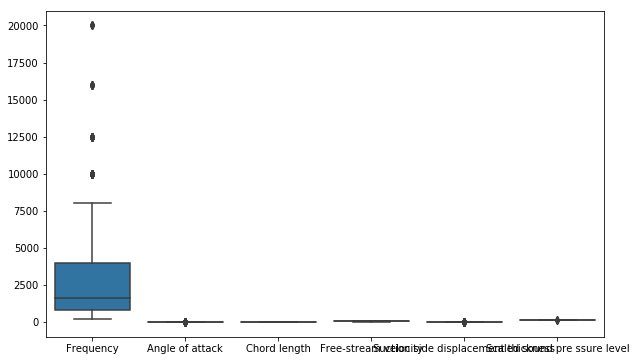

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

In [49]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pre ssure level
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


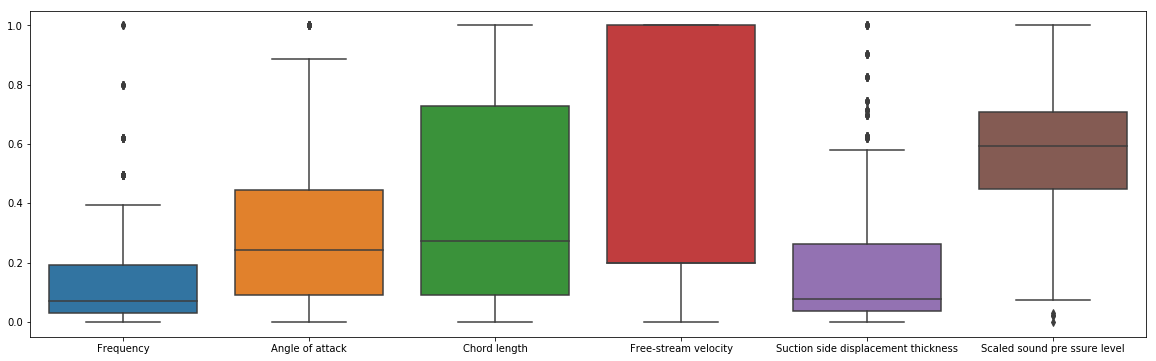

In [50]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

### 4.Выполните замену категориальных признаков; выберите и обоснуйте способ замены
категориальных признаков нет

### 5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

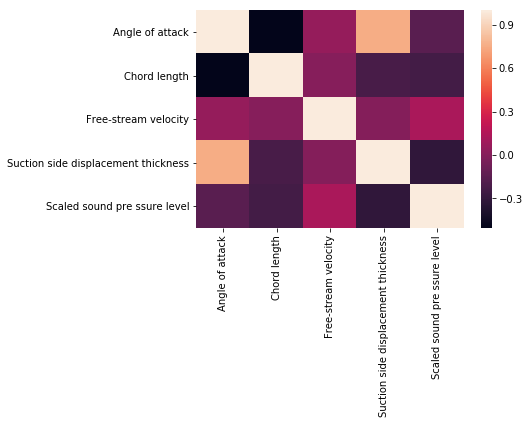

In [51]:
df_corr = df.drop('Frequency', axis=1).corr()
sns.heatmap(df_corr)
plt.show()

In [52]:
df_corr

,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pre ssure level
Angle of attack,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream velocity,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction side displacement thickness,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Scaled sound pre ssure level,-0.156108,-0.236162,0.125103,-0.312670,1.000000


### 6.Заполните пропущенные значения в данных

In [53]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (1503, 6)


Frequency                              1503
Angle of attack                        1503
Chord length                           1503
Free-stream velocity                   1503
Suction side displacement thickness    1503
Scaled sound pre ssure level           1503
dtype: int64

### 7.Решите поставленную задачу регрессии в соответствии с заданием.
Линейная регрессия без использования регуляризаторов <br>Линейная регрессия, RIDGE регуляризатор


In [54]:
X, y = df.drop('Frequency', axis=1), df['Frequency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Линейная регрессия без использования регуляризаторов

In [55]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

51      0.052518
1465    0.018939
184    -0.012894
1000   -0.101735
746    -0.072556
1032    0.277753
925    -0.029951
394    -0.089879
597     0.087252
588     0.069789
765     0.193006
141    -0.123757
1121   -0.026910
1061    0.044148
415     0.026877
Name: Frequency, dtype: float64


In [56]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.648742353905
spearmen correlation:  0.611921495168


Линейная регрессия, RIDGE регуляризатор

In [57]:
import warnings
warnings.filterwarnings("ignore")

regr = linear_model.Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
regr_grid = GridSearchCV(regr, params)
regr_grid.fit(X_train, y_train)
best_alpha = regr_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.15


In [58]:
regr = linear_model.Ridge(alpha=best_alpha)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

51      0.053058
1465    0.018877
184    -0.012580
1000   -0.101507
746    -0.072669
1032    0.276699
925    -0.029520
394    -0.088398
597     0.087669
588     0.069851
765     0.192372
141    -0.124453
1121   -0.026292
1061    0.044419
415     0.027210
Name: Frequency, dtype: float64


In [59]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.648778421206
spearmen correlation:  0.6119731963
